In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('drive/MyDrive/dataset/house_price.xls')

#Variable que l'on cherche a éxpliquer: price.
#Variables actives a considéré :


In [6]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [15]:
#Nommer les individus(maisons)
#créer la colonne "Maisons" à insérer 
d = list(range(1,4601))
d_m = [] 
for i in d :
  v= 'm_'+ str(i)
  d_m.append(v)

In [16]:
#insérer la colonne dans la DataFrame 
df.insert(0, 'Maisons', d_m)

In [17]:
#Définir la colonne "Maisons" comme colonne d'index
df.set_index("Maisons",inplace=True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
Maisons,,,,,,,,,,,,,,,,,,
m_1,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
m_2,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
m_3,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
m_4,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
m_5,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m_4596,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
m_4597,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
m_4598,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA


In [18]:
#Affichage par ordre croisant des prix et on remarque que certaines maisons on un prix null 
df.sort_values('price',ascending=True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
Maisons,,,,,,,,,,,,,,,,,,
m_4473,2014-06-09 00:00:00,0.0,4.0,3.75,4060,19290,2.0,0,0,3,4060,0,2002,0,21418 SE 5th Pl,Sammamish,WA 98074,USA
m_4543,2014-06-25 00:00:00,0.0,5.0,3.50,2640,6895,2.0,0,0,3,2640,0,2001,0,34529 SE Jay Ct,Snoqualmie,WA 98065,USA
m_4482,2014-06-11 00:00:00,0.0,5.0,2.75,3240,6863,2.0,0,0,3,3240,0,2013,1923,1301-1303 Monterey Ave NE,Renton,WA 98056,USA
m_4409,2014-05-21 00:00:00,0.0,5.0,2.25,2880,11965,2.0,0,0,4,2880,0,1990,0,25437 163rd Pl SE,Covington,WA 98042,USA
m_4412,2014-05-22 00:00:00,0.0,5.0,2.25,2000,7900,1.0,0,0,4,1300,700,1986,0,3202 S 194th St,SeaTac,WA 98188,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m_2762,2014-06-18 00:00:00,4489000.0,4.0,3.00,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,WA 98004,USA
m_2655,2014-06-17 00:00:00,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA
m_2287,2014-06-11 00:00:00,7062500.0,5.0,4.50,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,WA 98004,USA


In [19]:
#Supprimer la colonne "date" et "country"
del df['date']
del df['country']

In [20]:
#Affichage du nombres de lignes ayant un prix=0
df.loc[df.price == 0,"price"].count()

49

#Supprimer les lignes a valeurs de prix =0

In [22]:
df = df.drop(df[df.price==0].index)
df.sort_values('price',ascending=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
Maisons,,,,,,,,,,,,,,,,
m_4352,7800.0,2.0,1.00,780,16344,1.0,0,0,1,780,0,1942,0,4229 S 144th St,Tukwila,WA 98168
m_1220,80000.0,1.0,0.75,430,5050,1.0,0,0,2,430,0,1912,0,32215 E Rutherford St,Carnation,WA 98014
m_1588,83000.0,2.0,1.00,900,8580,1.0,0,0,3,900,0,1918,0,14440 51st Ave S,Tukwila,WA 98168
m_4408,83300.0,3.0,2.00,1490,7770,1.0,0,0,4,1490,0,1990,0,26017 189th Ave SE,Covington,WA 98042
m_4416,83300.0,3.0,2.00,1370,78408,1.0,0,0,5,1370,0,1964,0,24007 196th Ave SE,Covington,WA 98042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m_2762,4489000.0,4.0,3.00,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,WA 98004
m_2655,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040
m_2287,7062500.0,5.0,4.50,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,WA 98004


#Boite à moustache pour la variables "price" et on remarque un certains nombres de valeurs aberrantes

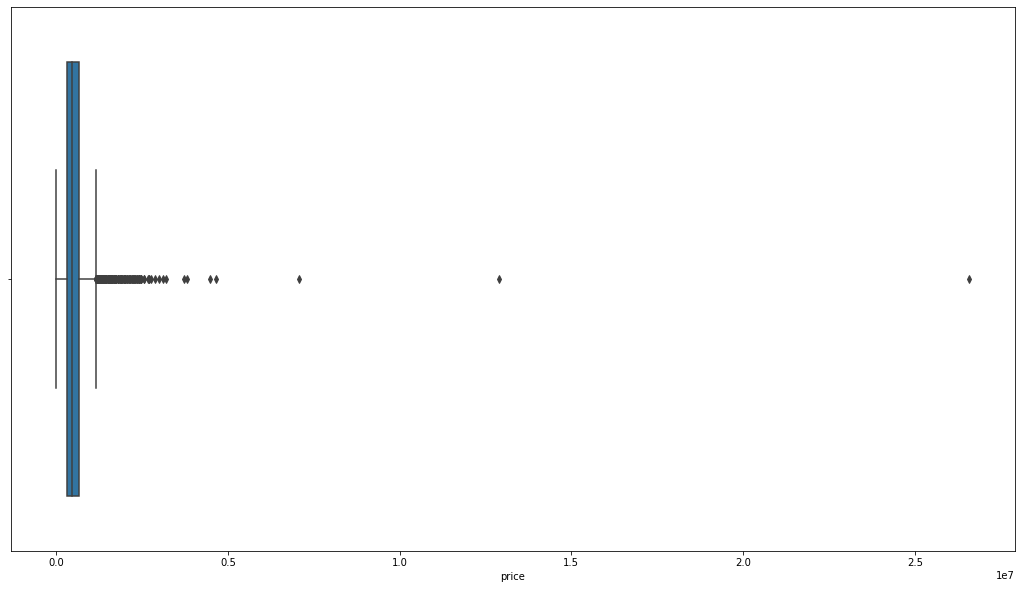

In [23]:
plt.figure(figsize=(18,10))
sns.boxplot(x='price',data=df)

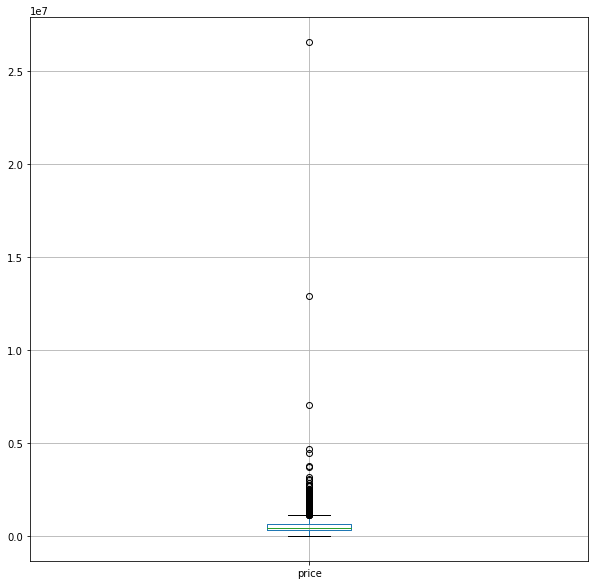

In [24]:
df.boxplot('price',figsize=(10,10))

#Calcule des bornes sup et inf de laa boite a moustache afin de supprimer les valeurs abérrantes

In [26]:
import numpy as np
price = np.array(df['price'])
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
q2=np.quantile(price,0.5)
eiq = q3-q1
vmax = 1.5 * eiq + q3
vmin = q1 - 1.5 * eiq  
bi = max(min(df['price']),vmin)
bs = min(max(df['price']),vmax)
print("Borne inferieur",vmin)
print("Borne supérieur",vmax)

Borne inferieur -170589.28571375
Borne supérieur 1154353.57142825


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


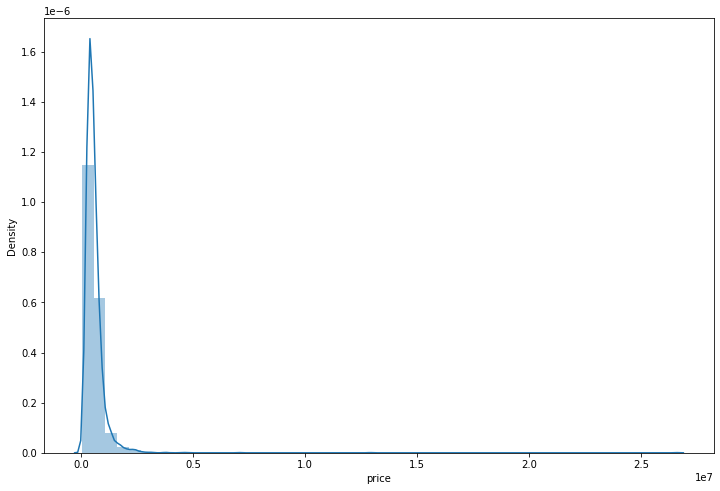

In [27]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

In [ ]:
len(df)*(0.10)

454.90000000000003

In [28]:
df.sort_values('price',ascending=False).head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
Maisons,,,,,,,,,,,,,,,,
m_4351,26590000.0,3.0,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031
m_4347,12899000.0,3.0,2.50,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199
m_2287,7062500.0,5.0,4.50,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,WA 98004
m_2655,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040
m_2762,4489000.0,4.0,3.00,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,WA 98004


#suppresion des valeurs aberrantes

In [29]:
df2 = df.drop(df[df.price>=1154353.57142825].index)
df2.sort_values('price',ascending=False).head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
Maisons,,,,,,,,,,,,,,,,
m_2032,1150000.0,3.0,1.5,2170,16600,1.0,1,2,3,1130,1040,1979,2014,2244 West Lake Sammamish Pkwy NE,Redmond,WA 98052
m_3359,1150000.0,3.0,2.0,2110,18815,2.0,0,0,5,2110,0,1979,0,2942 222nd Pl SE,Sammamish,WA 98075
m_1183,1150000.0,6.0,4.5,6040,219542,2.0,0,0,3,4100,1940,1996,0,4616 252nd Ave SE,Issaquah,WA 98029
m_4083,1150000.0,3.0,2.5,3830,48743,2.0,0,0,3,3830,0,1991,0,16123 SE 44th Way,Bellevue,WA 98006
m_3947,1150000.0,5.0,2.5,3580,8921,2.0,0,0,3,3580,0,2000,0,409 20th Ave,Kirkland,WA 98033


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


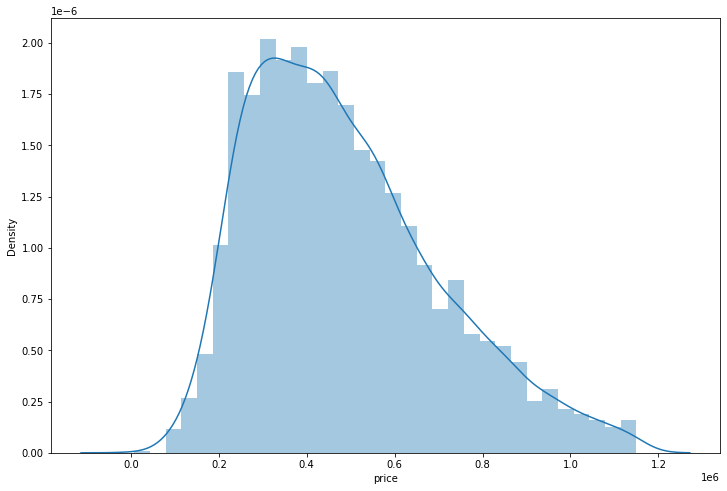

In [30]:
plt.figure(figsize=(12,8))
sns.distplot(df2['price'])

#transformer en str afin qu'elles soit considéré comme var qualitatives

In [32]:
df2['waterfront']=df2['waterfront'].astype('str')
df2['view']=df2['view'].astype('str')
df2['condition']=df2['condition'].astype('str')
type(df2['condition'][0])

str

In [34]:
len(df2)*(0.03)

129.32999999999998

In [35]:
len(df2)

4311

In [36]:
df1 = df2.iloc[0:4181]
df3 = df2.iloc[4181:]
with pd.ExcelWriter('House_complet.xlsx') as writer:  

    df1.to_excel(writer, sheet_name='Sheet_name_1')

    df3.to_excel(writer, sheet_name='Sheet_name_2')

#individus qui vont participer a la constructions des axes




In [38]:
df_cat=df1.select_dtypes(include='object')
df_num=df1.select_dtypes(exclude='object')

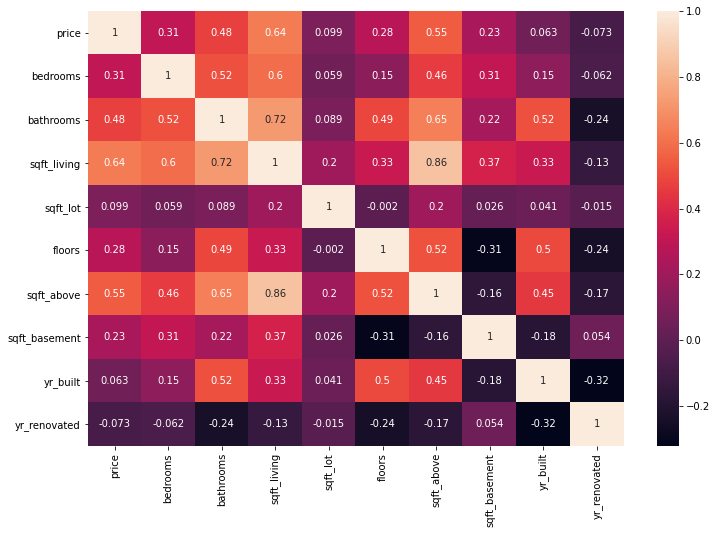

In [39]:
plt.figure(figsize=[12,8])
sns.heatmap(df_num.corr(),annot=True)
plt.show()

##individus supplementaire qui ne vont pas participer à la constructions des axes


In [40]:
df_cat=df3.select_dtypes(include='object')
df_num=df3.select_dtypes(exclude='object')

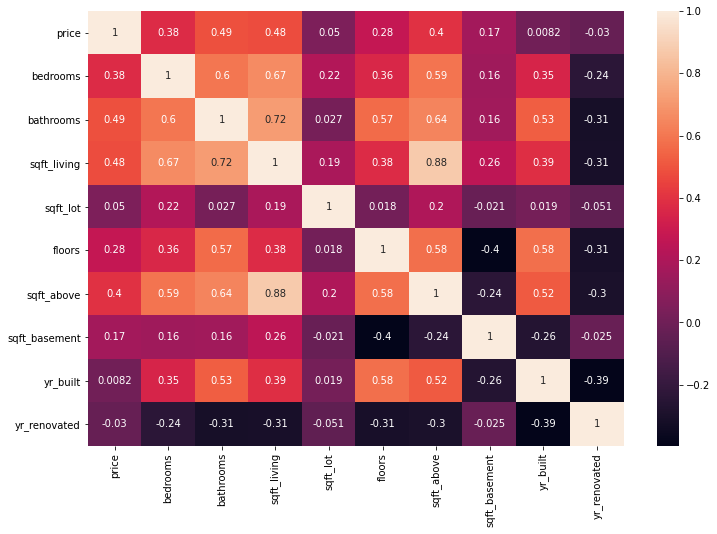

In [41]:
plt.figure(figsize=[12,8])
sns.heatmap(df_num.corr(),annot=True)
plt.show()